In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#the following is an overview of (titanic data)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

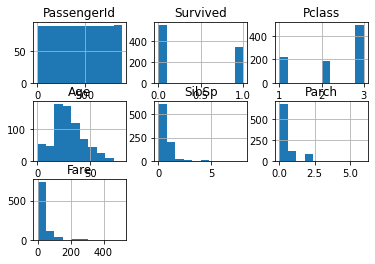

In [4]:
# Let's take a quick look at our data first

df.hist()

<AxesSubplot:>

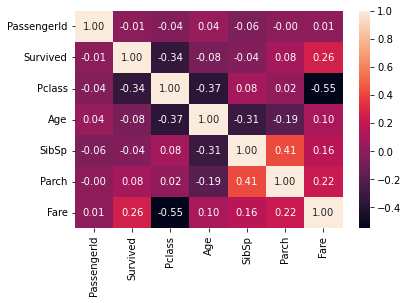

In [7]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

In [9]:
df.loc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [10]:
#Aggregate data for easy understanding with the sum() function

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#With the help of the isna() and sum() functions
#we know that in the dataset there are no empty values in the dataset except 
#the Age column with 177 missing values, Cabin Column 687 and Embarked 2 column.

In [13]:
#Handling Missing Value Age

#First, let's duplicate the dataframe

#second, find the average value of the Age . column

#Third, fill in the blank value in the Age column with the average value obtained

#Fourth, check again whether there are still missing values in the Age column

# step 1
mean_age = df['Age'].mean()
# step 2
df['Age'] = df['Age'].fillna(mean_age)

In [16]:
#Handling Missing Value Cabin

df.drop('Cabin', axis=1, inplace=True)

In [14]:
#Missing Value of Embarked Column
#We will fill in the 2 values with the value that appears the most 
#considering the data type of this column is categorical data in the form of strings S, C and Q.

#step 1
modus = df['Embarked'].mode()[0]
# step 2
df['Embarked'] = df['Embarked'].fillna(modus)

In [17]:
#recheck missing values

df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:xlabel='sex', ylabel='age'>

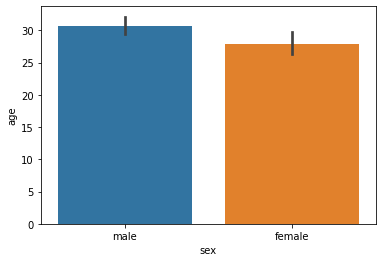

In [26]:
#we check the data by age and gender

sex_age = sns.load_dataset('titanic')
sns.barplot(x='sex', y='age', data=sex_age)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


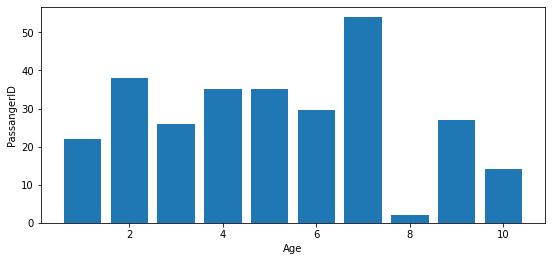

In [45]:
#sample data 10 rows
#to find out age based on passanger id
df_10= df.head(10)


fig = plt.figure(figsize=(7,3))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Age')
ax.set_ylabel('PassangerID')

ax.bar(df_10['PassengerId'],df_10['Age'])
plt.show()

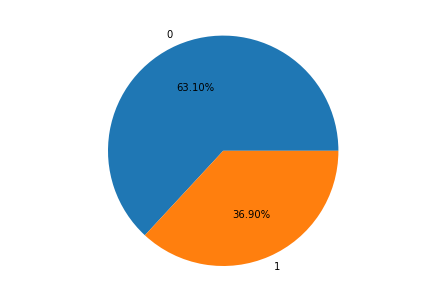

In [46]:
# we group age based on survived
dfsurvived = df.groupby('Survived').sum()['Age'].reset_index()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(dfsurvived['Age'],labels=dfsurvived['Survived'],autopct='%1.2f%%')
plt.show()

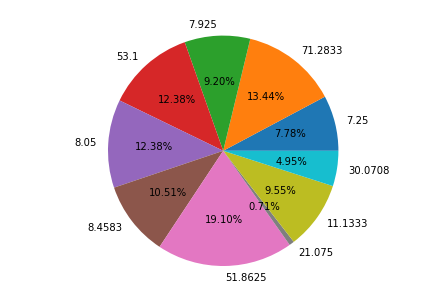

In [66]:
# we group age based on Fare

df_10= df.groupby('Fare').sum()['Age'].reset_index()
df_10= df.head(10)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(df_10['Age'],labels=df_10['Fare'],autopct='%1.2f%%')
plt.show()